In [194]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler


#데이터 분할
from sklearn.model_selection import train_test_split
#LightGBM 패키지 불러오기
from lightgbm import LGBMClassifier

#변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

from subprocess import call
from IPython.display import Image
#로지스틱 회귀
from statsmodels.api import Logit
#분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score,recall_score, f1_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats as stats

from scipy.stats import chi2_contingency

%matplotlib inline
matplotlib.rc('font',family = 'Noto Sans CJK JP')
#-기호 false다
matplotlib.rc('axes',unicode_minus = False)

In [195]:
df = pd.read_csv("/home/piai/바탕화면/B3_반도체/7_Path.csv", encoding='euc-kr')
df

,No_Die,Lot_Num,Wafer_Num,Ox_Chamber,photo_soft_Chamber,lithography_Chamber,Etching_Chamber,Chamber_Num,Error_message,Error,Mini_Path,Real_Path,Target,Datetime
0,NOLSM325131325,13,28,2,1,1,1,1,none,1,2111,21111,141,01-03-2022
1,NOLSM326132326,13,29,2,1,1,2,2,none,1,2112,21122,55,01-03-2022
2,NOLSM327133327,13,30,2,1,1,3,3,none,1,2113,21133,96,01-03-2022
3,NOLSM328134328,13,31,2,1,1,1,1,none,1,2111,21111,105,01-03-2022
4,NOLSM329135329,13,32,2,1,1,2,2,none,1,2112,21122,79,01-03-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,32,11,3,3,3,3,3,none,1,3333,33333,78,28-02-2022
1700,NOLSM8493212,32,12,1,1,1,3,3,none,1,1113,11133,42,28-02-2022
1701,NOLSM8503213,32,13,1,1,2,2,2,none,1,1122,11222,42,28-02-2022
1702,NOLSM8513214,32,14,1,1,3,1,1,none,1,1131,11311,24,28-02-2022


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   No_Die               1704 non-null   object
 1   Lot_Num              1704 non-null   int64 
 2   Wafer_Num            1704 non-null   int64 
 3   Ox_Chamber           1704 non-null   int64 
 4   photo_soft_Chamber   1704 non-null   int64 
 5   lithography_Chamber  1704 non-null   int64 
 6   Etching_Chamber      1704 non-null   int64 
 7   Chamber_Num          1704 non-null   int64 
 8   Error_message        1704 non-null   object
 9   Error                1704 non-null   int64 
 10  Mini_Path            1704 non-null   int64 
 11  Real_Path            1704 non-null   int64 
 12  Target               1704 non-null   int64 
 13  Datetime             1704 non-null   object
dtypes: int64(11), object(3)
memory usage: 186.5+ KB


In [197]:
df['Mini_Path']

0       2111
1       2112
2       2113
3       2111
4       2112
        ... 
1699    3333
1700    1113
1701    1122
1702    1131
1703    1211
Name: Mini_Path, Length: 1704, dtype: int64

In [198]:
df['Mini_Path'][1]

2112

In [199]:
dict_target_sum = {}



for num1 in range(1, 4):
    for num2 in range(1, 4):
        for num3 in range(1, 4):
            for num4 in range(1, 4):
                num = num1 * 10000 + num2 * 1000 + num3 * 100 + num4*10 + num4
                sum = 0  # 각 경우의 수마다 sum 값을 초기화합니다.
                for i in range(len(df)):
                    if num == df['Real_Path'][i]:
                        sum += df['Target'][i]
                dict_target_sum[num] = sum


print(dict_target_sum)


{11111: 2703, 11122: 988, 11133: 2885, 11211: 1439, 11222: 3861, 11233: 1808, 11311: 2706, 11322: 982, 11333: 2685, 12111: 2907, 12122: 1334, 12133: 2640, 12211: 1010, 12222: 4545, 12233: 767, 12311: 2809, 12322: 1299, 12333: 3462, 13111: 3269, 13122: 1474, 13133: 2637, 13211: 900, 13222: 4250, 13233: 1072, 13311: 2882, 13322: 1025, 13333: 2878, 21111: 3273, 21122: 1155, 21133: 2871, 21211: 761, 21222: 4430, 21233: 1157, 21311: 2359, 21322: 978, 21333: 3492, 22111: 3182, 22122: 1271, 22133: 3152, 22211: 1017, 22222: 4767, 22233: 1053, 22311: 2343, 22322: 784, 22333: 2943, 23111: 2833, 23122: 858, 23133: 2635, 23211: 750, 23222: 4692, 23233: 908, 23311: 2225, 23322: 710, 23333: 2271, 31111: 3423, 31122: 1274, 31133: 3169, 31211: 1494, 31222: 3861, 31233: 1213, 31311: 2846, 31322: 1382, 31333: 2554, 32111: 2691, 32122: 727, 32133: 2537, 32211: 1064, 32222: 4825, 32233: 867, 32311: 2827, 32322: 904, 32333: 2609, 33111: 2724, 33122: 597, 33133: 2291, 33211: 768, 33222: 2525, 33233: 812, 33

In [200]:
for num1 in range(1, 4):
    for num2 in range(1, 4):
        for num3 in range(1, 4):
            for num4 in range(1, 4):
                num = num1 * 10000 + num2 * 1000 + num3 * 100 + num4*10 + num4
                count = 0  # 각 경우의 수마다 sum 값을 초기화합니다.
                for i in range(len(df)):
                    if num == df['Real_Path'][i]:
                        count += 1
                dict_target_sum[num] = ((dict_target_sum[num]/(count*2000))*100).round(3)

print(dict_target_sum)
dict_target_sum[11111]

{11111: 4.66, 11122: 4.117, 11133: 4.808, 11211: 5.996, 11222: 4.709, 11233: 7.533, 11311: 4.51, 11322: 4.092, 11333: 4.629, 12111: 4.845, 12122: 5.558, 12133: 4.552, 12211: 4.208, 12222: 6.886, 12233: 3.196, 12311: 4.843, 12322: 5.412, 12333: 5.969, 13111: 5.636, 13122: 6.142, 13133: 5.993, 13211: 3.75, 13222: 4.942, 13233: 4.467, 13311: 4.969, 13322: 4.271, 13333: 4.962, 21111: 5.643, 21122: 4.812, 21133: 4.95, 21211: 3.171, 21222: 5.274, 21233: 4.821, 21311: 4.067, 21322: 4.075, 21333: 6.236, 22111: 5.486, 22122: 5.296, 22133: 6.567, 22211: 4.623, 22222: 5.297, 22233: 4.786, 22311: 4.506, 22322: 4.356, 22333: 5.66, 23111: 5.448, 23122: 4.767, 23133: 6.588, 23211: 4.167, 23222: 5.456, 23233: 5.044, 23311: 4.279, 23322: 3.944, 23333: 4.367, 31111: 6.583, 31122: 7.078, 31133: 6.094, 31211: 8.3, 31222: 5.516, 31233: 6.739, 31311: 5.473, 31322: 7.678, 31333: 4.912, 32111: 5.175, 32122: 4.039, 32133: 4.879, 32211: 5.911, 32222: 5.61, 32233: 4.817, 32311: 5.437, 32322: 5.022, 32333: 7.247,

4.66

In [201]:
# selected_combinations = []

# for key1 in dict_target_sum:
#     key_str1 = str(key1)
#     for key2 in dict_target_sum:
#         key_str2 = str(key2)
#         if key1 != key2 and key_str1[0] != key_str2[0] and key_str1[1] != key_str2[1] and key_str1[2] != key_str2[2] and key_str1[3] != key_str2[3] :
#             for key3 in dict_target_sum:
#                 key_str3 = str(key3)
#                 if key1 != key3 and key2 != key3 and key_str1[0] != key_str3[0] and key_str2[0] != key_str3[0] and  key_str1[1] != key_str3[1] and key_str2[1] != key_str3[1] and  key_str1[0] != key_str3[2] and key_str2[2] != key_str3[2] and  key_str1[3] != key_str3[3] and key_str2[3] != key_str3[3]:
#                         selected_combinations.append((key1, key2, key3))

# print(selected_combinations)
# len(selected_combinations)

selected_combinations = []

def is_non_overlapping(keys):
    key_strs = [str(key) for key in keys]
    for i in range(len(key_strs[0])):
        if len(set(key_str[i] for key_str in key_strs)) != len(keys):
            return False
    return True

for key1 in dict_target_sum:
    for key2 in dict_target_sum:
        for key3 in dict_target_sum:
            if key1 != key2 and key1 != key3 and key2 != key3:
                if is_non_overlapping([key1, key2, key3]):
                    selected_combinations.append((key1, key2, key3))

print(selected_combinations)
print(len(selected_combinations))


[(11111, 22222, 33333), (11111, 22233, 33322), (11111, 22322, 33233), (11111, 22333, 33222), (11111, 23222, 32333), (11111, 23233, 32322), (11111, 23322, 32233), (11111, 23333, 32222), (11111, 32222, 23333), (11111, 32233, 23322), (11111, 32322, 23233), (11111, 32333, 23222), (11111, 33222, 22333), (11111, 33233, 22322), (11111, 33322, 22233), (11111, 33333, 22222), (11122, 22211, 33333), (11122, 22233, 33311), (11122, 22311, 33233), (11122, 22333, 33211), (11122, 23211, 32333), (11122, 23233, 32311), (11122, 23311, 32233), (11122, 23333, 32211), (11122, 32211, 23333), (11122, 32233, 23311), (11122, 32311, 23233), (11122, 32333, 23211), (11122, 33211, 22333), (11122, 33233, 22311), (11122, 33311, 22233), (11122, 33333, 22211), (11133, 22211, 33322), (11133, 22222, 33311), (11133, 22311, 33222), (11133, 22322, 33211), (11133, 23211, 32322), (11133, 23222, 32311), (11133, 23311, 32222), (11133, 23322, 32211), (11133, 32211, 23322), (11133, 32222, 23311), (11133, 32311, 23222), (11133, 32

In [202]:
converted_combinations = []
for i in range(len(selected_combinations)):
    tuple_elements = list(selected_combinations[i])
    for j in range(3):
        tuple_elements[j] = int(tuple_elements[j])
    converted_combinations.append(tuple(tuple_elements))

path_mean_failure = {}
for i in range(len(selected_combinations)):
    for j in range(3):
        if j + 2 < 3:  # 범위 초과 방지
            new_failure = (dict_target_sum[converted_combinations[i][j]] +
                           dict_target_sum[converted_combinations[i][j+1]] +
                           dict_target_sum[converted_combinations[i][j+2]]) / 3
            path_mean_failure[selected_combinations[i]] = new_failure
            
rounded_path_mean_failure = {key: round(value, 3) for key, value in path_mean_failure.items()}

print(rounded_path_mean_failure)
print(len(rounded_path_mean_failure))


{(11111, 22222, 33333): 5.027, (11111, 22233, 33322): 4.262, (11111, 22322, 33233): 4.509, (11111, 22333, 33222): 4.678, (11111, 23222, 32333): 5.788, (11111, 23233, 32322): 4.909, (11111, 23322, 32233): 4.474, (11111, 23333, 32222): 4.879, (11111, 32222, 23333): 4.879, (11111, 32233, 23322): 4.474, (11111, 32322, 23233): 4.909, (11111, 32333, 23222): 5.788, (11111, 33222, 22333): 4.678, (11111, 33233, 22322): 4.509, (11111, 33322, 22233): 4.262, (11111, 33333, 22222): 5.027, (11122, 22211, 33333): 4.622, (11122, 22233, 33311): 4.443, (11122, 22311, 33233): 4.378, (11122, 22333, 33211): 4.681, (11122, 23211, 32333): 5.177, (11122, 23233, 32311): 4.866, (11122, 23311, 32233): 4.404, (11122, 23333, 32211): 4.798, (11122, 32211, 23333): 4.798, (11122, 32233, 23311): 4.404, (11122, 32311, 23233): 4.866, (11122, 32333, 23211): 5.177, (11122, 33211, 22333): 4.681, (11122, 33233, 22311): 4.378, (11122, 33311, 22233): 4.443, (11122, 33333, 22211): 4.622, (11133, 22211, 33322): 4.257, (11133, 2

In [203]:
sorted_path_mean_failure = dict(sorted(rounded_path_mean_failure.items(), key=lambda item: item[1], reverse=False))
sorted_path_mean_failure

# # 그래프 데이터 준비
# labels = [str(key) for key in sorted_path_mean_failure.keys()]
# values = list(sorted_path_mean_failure.values())

# # 그래프 그리기
# plt.figure(figsize=(10, 6))
# plt.bar(labels, values, color='skyblue')
# plt.xlabel('Tuples')
# plt.ylabel('Mean Failure Value')
# plt.title('Mean Failure Values for Tuples')
# plt.xticks(rotation=45)  # x축 레이블 회전
# plt.show()

{(12233, 21311, 33122): 3.527,
 (12233, 33122, 21311): 3.527,
 (21311, 12233, 33122): 3.527,
 (21311, 33122, 12233): 3.527,
 (33122, 12233, 21311): 3.527,
 (33122, 21311, 12233): 3.527,
 (12133, 21211, 33322): 3.687,
 (12133, 33322, 21211): 3.687,
 (21211, 12133, 33322): 3.687,
 (21211, 33322, 12133): 3.687,
 (33322, 12133, 21211): 3.687,
 (33322, 21211, 12133): 3.687,
 (13333, 21211, 32122): 4.057,
 (13333, 32122, 21211): 4.057,
 (21211, 13333, 32122): 4.057,
 (21211, 32122, 13333): 4.057,
 (32122, 13333, 21211): 4.057,
 (32122, 21211, 13333): 4.057,
 (12233, 21111, 33322): 4.059,
 (12233, 33322, 21111): 4.059,
 (21111, 12233, 33322): 4.059,
 (21111, 33322, 12233): 4.059,
 (33322, 12233, 21111): 4.059,
 (33322, 21111, 12233): 4.059,
 (13322, 21211, 32133): 4.107,
 (13322, 32133, 21211): 4.107,
 (21211, 13322, 32133): 4.107,
 (21211, 32133, 13322): 4.107,
 (32133, 13322, 21211): 4.107,
 (32133, 21211, 13322): 4.107,
 (12133, 21311, 33222): 4.111,
 (12133, 33222, 21311): 4.111,
 (21311,

In [204]:
unique_path_mean_failure = {}
for key, value in sorted_path_mean_failure.items():
    sorted_key = tuple(sorted(key))  # 튜플 내부 데이터 정렬
    unique_path_mean_failure[sorted_key] = value

print(unique_path_mean_failure)
len(unique_path_mean_failure)

{(12233, 21311, 33122): 3.527, (12133, 21211, 33322): 3.687, (13333, 21211, 32122): 4.057, (12233, 21111, 33322): 4.059, (13322, 21211, 32133): 4.107, (12133, 21311, 33222): 4.111, (12233, 21122, 33311): 4.144, (12333, 21211, 33122): 4.152, (12211, 21133, 33322): 4.166, (12233, 21322, 33111): 4.17, (11333, 22211, 33122): 4.19, (13233, 21311, 32122): 4.191, (11311, 22233, 33122): 4.204, (12211, 21322, 33133): 4.23, (13211, 21322, 32133): 4.235, (11133, 22211, 33322): 4.257, (11111, 22233, 33322): 4.262, (11333, 23211, 32122): 4.278, (12133, 21322, 33211): 4.298, (12311, 21233, 33122): 4.327, (12322, 21211, 33133): 4.33, (12111, 21233, 33322): 4.335, (11133, 22311, 33222): 4.342, (11322, 22211, 33133): 4.374, (11122, 22311, 33233): 4.378, (11322, 23211, 32133): 4.379, (11122, 23311, 32233): 4.404, (11122, 22233, 33311): 4.443, (11111, 23322, 32233): 4.474, (11133, 22322, 33211): 4.477, (12111, 21322, 33233): 4.477, (12233, 23122, 31311): 4.479, (12311, 21133, 33222): 4.502, (11111, 22322

216

In [205]:
# import csv
# import os
# # 파일이 저장될 위치로 디렉토리 변경
# new_directory = "/home/piai/바탕화면/B3_반도체/"
# os.chdir(new_directory)

# # CSV 파일로 저장
# csv_file = "cuty_gyuseop.csv"

# with open(csv_file, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Tuple', 'Mean Failure Value'])  # 헤더 작성
#     for key, value in unique_path_mean_failure.items():
#         writer.writerow([str(key), value])
        
# print(f"CSV 파일 '{csv_file}'로 저장되었습니다.")


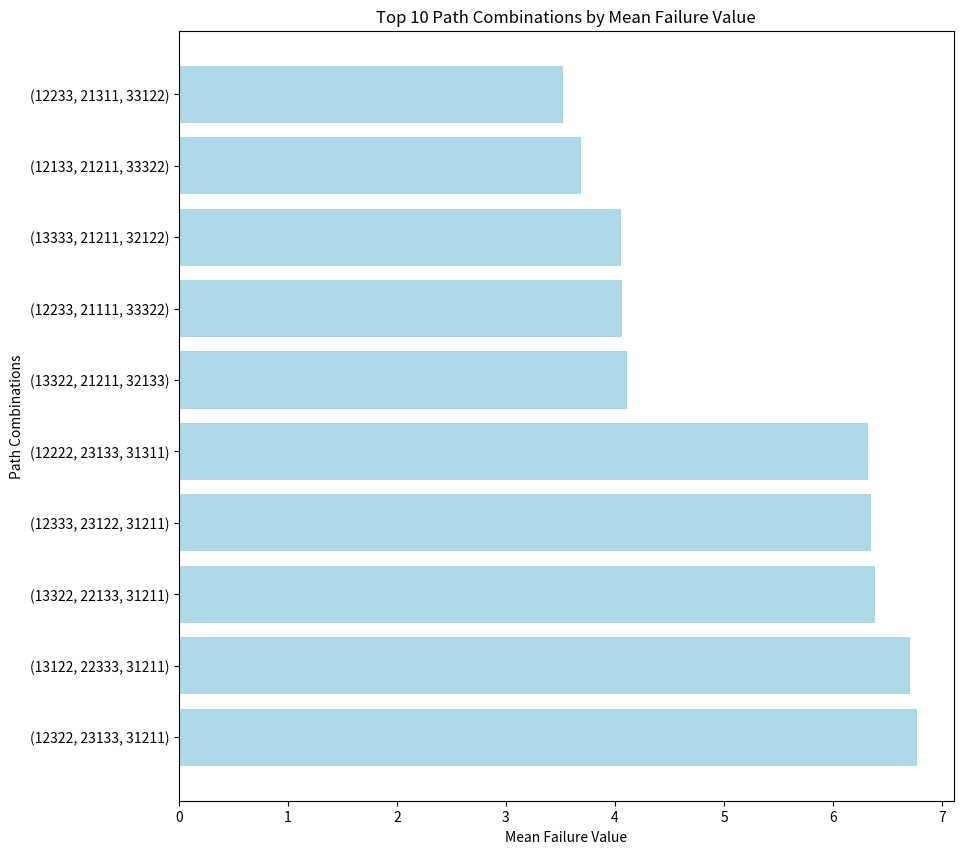

In [206]:
import matplotlib.pyplot as plt

# unique_path_mean_failure 딕셔너리의 값을 기준으로 정렬
sorted_unique_path_mean_failure = dict(sorted(unique_path_mean_failure.items(), key=lambda item: item[1]))

# 상위 10개와 하위 10개 값을 선택하여 따로 저장
top_10 = list(sorted_unique_path_mean_failure.items())[:5]
bot_10 = list(sorted_unique_path_mean_failure.items())[-5:]

# 상위 10개 값 시각화
top_combinations = [str(combination) for combination, _ in top_10]
top_values = [value for _, value in top_10]

# 하위 10개 값 시각화
bot_combinations = [str(combination) for combination, _ in bot_10]
bot_values = [value for _, value in bot_10]

for i in bot_combinations:
    top_combinations.append(i)

for i in bot_values:
    top_values.append(i) 
  
plt.figure(figsize=(10, 10))
plt.barh(top_combinations, top_values, color='lightblue')
plt.xlabel('Mean Failure Value')
plt.ylabel('Path Combinations')
plt.title('Top 10 Path Combinations by Mean Failure Value')
plt.gca().invert_yaxis()  # y축 뒤집기
plt.show()


# # 하위 10개 값 시각화
# bot_combinations = [str(combination) for combination, _ in bot_10]
# bot_values = [value for _, value in bot_10]

# plt.figure(figsize=(10, 10))
# plt.barh(bot_combinations, bot_values, color='green')
# plt.xlabel('Mean Failure Value')
# plt.ylabel('Path Combinations')
# plt.title('bot 10 Path Combinations by Mean Failure Value')
# plt.gca().invert_yaxis()  # y축 뒤집기
# plt.show()

In [207]:
df_main_para = pd.read_csv("/home/piai/다운로드/운전para (이상치_결측치 처리_patt추가).csv", encoding='euc-kr')
df_main_para

,Unnamed: 0,No_Die,process,type,Temp_OXid,ppm,Pressure,Oxid_time,process 2,N2_HMDS,...,Temp_implantation,Furance_Temp,RTA_Temp,process4.1,Target,Lot_Num,Wafer_Num,Datetime,path,short_path
0,0,NOLSM325131325,Oxidation,dry,1214.307948,26.69,0.203,120,Photo,17.367,...,103.433,854,154,Inspect,141,13,28,01-03-2022,21111,2111
1,1,NOLSM326132326,Oxidation,dry,978.110792,30.86,0.217,137,Photo,16.090,...,105.552,895,156,Inspect,55,13,29,01-03-2022,21122,2112
2,2,NOLSM327133327,Oxidation,dry,1176.019149,31.07,0.218,116,Photo,19.026,...,102.598,898,152,Inspect,96,13,30,01-03-2022,21133,2113
3,3,NOLSM328134328,Oxidation,dry,933.442733,31.04,0.196,143,Photo,18.891,...,102.963,879,155,Inspect,105,13,31,01-03-2022,21111,2111
4,4,NOLSM329135329,Oxidation,wet,1140.598752,31.37,0.215,76,Photo,13.788,...,101.419,882,155,Inspect,79,13,32,01-03-2022,21122,2112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,1663,NOLSM8483211,Oxidation,wet,1275.182502,45.10,0.214,21,Photo,16.029,...,101.503,868,152,Inspect,78,32,11,28-02-2022,33333,3333
1664,1664,NOLSM8493212,Oxidation,wet,1268.105427,45.07,0.215,22,Photo,17.587,...,101.061,867,152,Inspect,42,32,12,28-02-2022,11133,1113
1665,1665,NOLSM8503213,Oxidation,wet,1279.160563,45.12,0.214,21,Photo,16.445,...,101.506,868,152,Inspect,42,32,13,28-02-2022,11222,1122
1666,1666,NOLSM8513214,Oxidation,wet,1272.804948,45.34,0.213,20,Photo,15.306,...,101.360,868,152,Inspect,24,32,14,28-02-2022,11311,1131


In [208]:
df_main_para.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1668 non-null   int64  
 1   No_Die             1668 non-null   object 
 2   process            1668 non-null   object 
 3   type               1668 non-null   object 
 4   Temp_OXid          1668 non-null   float64
 5   ppm                1668 non-null   float64
 6   Pressure           1668 non-null   float64
 7   Oxid_time          1668 non-null   int64  
 8   process 2          1668 non-null   object 
 9   N2_HMDS            1668 non-null   float64
 10  pressure_HMDS      1668 non-null   float64
 11  temp_HMDS          1668 non-null   float64
 12  temp_HMDS_bake     1668 non-null   float64
 13  time_HMDS_bake     1668 non-null   float64
 14  spin1              1668 non-null   float64
 15  spin2              1668 non-null   float64
 16  spin3              1668 

In [209]:
df_main_para['Target'] = np.where(df_main_para['Target'] >= 195, 0, 1)
df_main_para['Target'].value_counts()

1    1547
0     121
Name: Target, dtype: int64

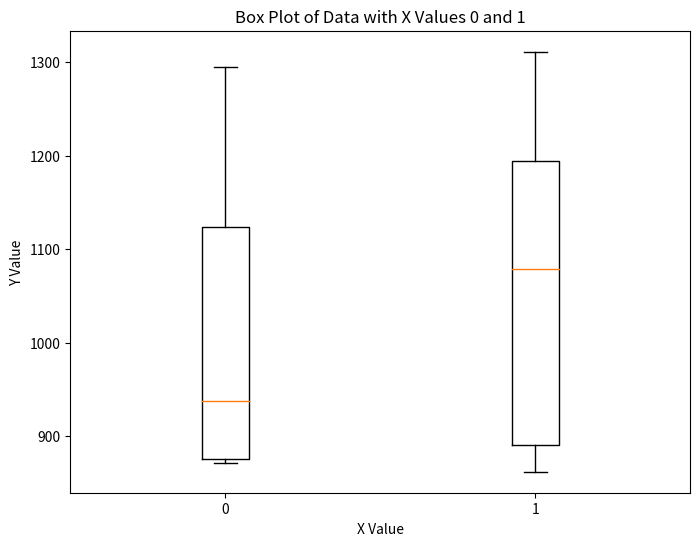

In [213]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['Temp_OXid']
data_1 = df_main_para[df_main_para['Target'] == 1]['Temp_OXid']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Box Plot of Data with X Values 0 and 1')
plt.show()
